In [1]:
# Import all the libraries we'll be using
import numpy as np
import statsmodels.api as sm
from statsmodels import regression, stats
import statsmodels
import matplotlib.pyplot as plt

# Focus on the Residuals

In [19]:
residuals = np.random.normal(0,1,100)

_,pvalue,_,_ = statsmodels.stats.stattools.jarque_bera(residuals)
print(pvalue)

residuals = np.random.poisson(size= 100)

_,pvalue,_,_ = statsmodels.stats.stattools.jarque_bera(residuals)
print(pvalue)

0.7447433350201744
1.963839766165371e-05


# Heteroskedasticity

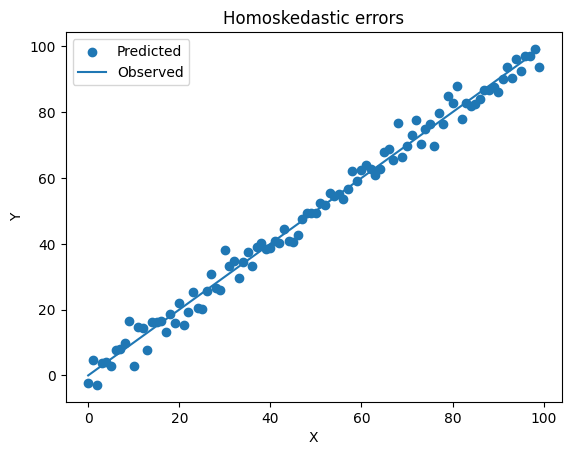

In [6]:
xs = np.arange(100)
y1 = xs + 3*np.random.randn(100)

slr1= regression.linear_model.OLS(y1,sm.add_constant(xs)).fit()

fit1 = slr1.params[0] + slr1.params[1]*xs

# Plot data and regression line
plt.scatter(xs, y1)
plt.plot(xs, fit1)
plt.title('Homoskedastic errors');
plt.legend(['Predicted', 'Observed'])
plt.xlabel('X')
plt.ylabel('Y');

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.356
Date:                Wed, 14 Jan 2026   Prob (F-statistic):              0.247
Time:                        16:15:48   Log-Likelihood:                -697.54
No. Observations:                 100   AIC:                             1399.
Df Residuals:                      98   BIC:                             1404.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.5167     51.918     -0.280      0.780    -117.547      88.514
x1             1.0549      0.906      1.164      0.247      -0.743       2.853
==============================================================================
Omnibus:                       31.129   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.017
Skew:                          -0.687   Prob(JB):                     2.24e-44
Kurtosis:                       9.808   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

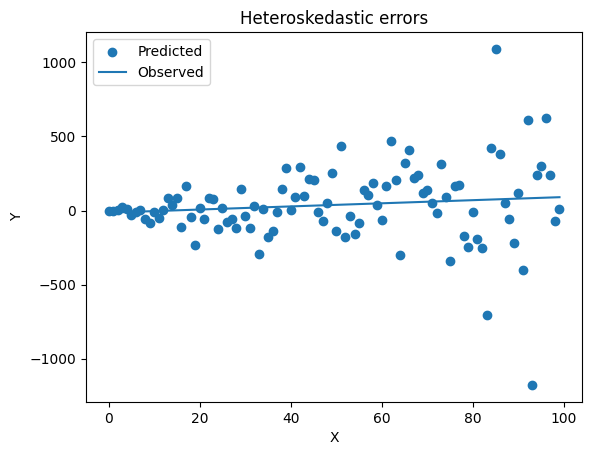

In [7]:
y2 = xs*(1+5*np.random.randn(100))

slr2 = regression.linear_model.OLS(y2,sm.add_constant(xs)).fit()
fit2= slr2.params[0] + slr2.params[1]*xs

# Plot data and regression line
plt.scatter(xs, y2)
plt.plot(xs, fit2)
plt.title('Heteroskedastic errors')
plt.legend(['Predicted', 'Observed'])
plt.xlabel('X')
plt.ylabel('Y')

# Print summary of regression results
slr2.summary()

In [10]:
residuals1 = y1-fit1
residuals2 = y2-fit2

xs_with_constant = sm.add_constant(xs)

_, jb_pvalue1, _, _ = statsmodels.stats.stattools.jarque_bera(residuals1)
_, jb_pvalue2, _, _ = statsmodels.stats.stattools.jarque_bera(residuals2)

print(f"p-value for residuals1 being normal {jb_pvalue1}")
print(f"p-value for residuals2 being normal {jb_pvalue2}")

_, pvalue1, _, _ = stats.diagnostic.het_breuschpagan(residuals1, xs_with_constant)
_, pvalue2, _, _ = stats.diagnostic.het_breuschpagan(residuals2, xs_with_constant)

print(f"p-value for residuals1 being heteroskedastic {pvalue1}")
print(f"p-value for residuals2 being heteroskedastic {pvalue2}")

p-value for residuals1 being normal 0.4650649816372562
p-value for residuals2 being normal 2.237453411090158e-44
p-value for residuals1 being heteroskedastic 0.47801294024374974
p-value for residuals2 being heteroskedastic 0.000715818339846737


In [28]:
# print(slr2.summary())
print(slr2.get_robustcov_results().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                    0.9355
Date:                Wed, 14 Jan 2026   Prob (F-statistic):              0.336
Time:                        17:09:36   Log-Likelihood:                -697.54
No. Observations:                 100   AIC:                             1399.
Df Residuals:                      98   BIC:                             1404.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.5167     35.253     -0.412      0.6

# Serial correlation of errors


[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_10188\1360531598.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction = model.params[0] + model.params[1]*x


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DAL   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     507.7
Date:                Wed, 14 Jan 2026   Prob (F-statistic):           3.93e-62
Time:                        16:45:06   Log-Likelihood:                -576.59
No. Observations:                 252   AIC:                             1157.
Df Residuals:                     250   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9504      0.301     89.609      0.000      26.358      27.543
x1             0.0467      0.002     22.532      0.000       0.043       0.051
==============================================================================
Omnibus:                       30.510   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.725
Skew:                          -0.750   Prob(JB):                     1.94e-10
Kurtosis:                       4.418   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

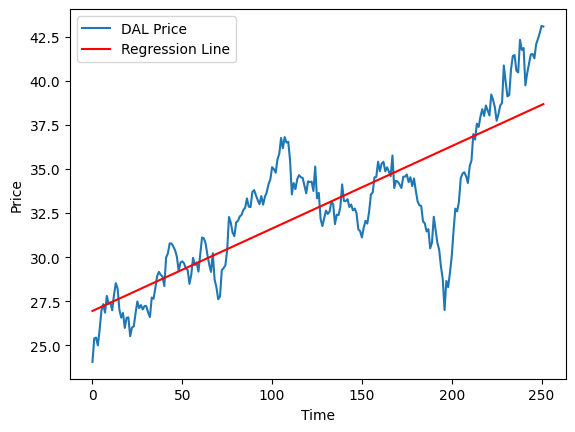

In [15]:
import yfinance as yf

start = '2014-01-01'
end = '2015-01-01'

y = yf.download('DAL',start=start,end=end,auto_adjust=True)['Close']['DAL']
x = np.arange(len(y))

# Regress pricing data against time
model = regression.linear_model.OLS(y, sm.add_constant(x)).fit()

# Construct the fit line
prediction = model.params[0] + model.params[1]*x

# Plot pricing data and regression line
plt.plot(x,y)
plt.plot(x, prediction, color='r')
plt.legend(['DAL Price', 'Regression Line'])
plt.xlabel('Time')
plt.ylabel('Price')

# Print summary of regression results
model.summary()


In [30]:
_, prices_qstats, prices_qstat_pvalues = statsmodels.tsa.stattools.acf(y, qstat=True)
_, residuals_qstats, residuals_qstats_pvalues = statsmodels.tsa.stattools.acf(y-prediction, qstat=True)

print(f'Prices autocorrelation p-values {prices_qstat_pvalues}')
print(f'Residuals autocorrelation p-values {residuals_qstats_pvalues}')

_, jb_pvalue, _, _ = statsmodels.stats.stattools.jarque_bera(y-prediction)
print(f'Jarque-Bera p-value that residuals are normally distributed {jb_pvalue}')


Prices autocorrelation p-values [1.40793918e-053 8.18631938e-101 5.25067676e-145 2.10713023e-186
 3.60875190e-225 1.93197008e-261 2.00465900e-295 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
Residuals autocorrelation p-values [8.84160416e-052 5.65455555e-096 9.55094915e-136 8.25229879e-172
 3.49629268e-204 1.31992639e-232 1.14577567e-257 9.32516505e-280
 1.87552467e-299 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
Jarque-Bera p-value that residuals are normally distributed 1.9413772219220666e-10


# Newey-West

In [17]:
from math import sqrt

cov_mat = stats.sandwich_covariance.cov_hac(model)

print(f'Old standard errors: {model.bse[0]},{model.bse[1]}')
print(f'Adjusted standard errors: {sqrt(cov_mat[0,0])} , {sqrt(cov_mat[1,1])}')

Old standard errors: 0.3007561775645463,0.0020733342810326876
Adjusted standard errors: 0.4431985899269773 , 0.004489277760259914


C:\Users\USER\AppData\Local\Temp\ipykernel_10188\3697242425.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Old standard errors: {model.bse[0]},{model.bse[1]}')


# 다중공선성 (Multicollinearity) 진단

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

R-squared: 0.9024693262726456
t-statistics of coefficients:
 const   -11.782160
x1       23.780519
x2       -4.501917
dtype: float64



C:\Users\USER\AppData\Local\Temp\ipykernel_10188\3032110403.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mlr_prediction = mlr.params[0] + mlr.params[1]*b1 + mlr.params[2]*b2


Text(0, 0.5, 'Price')

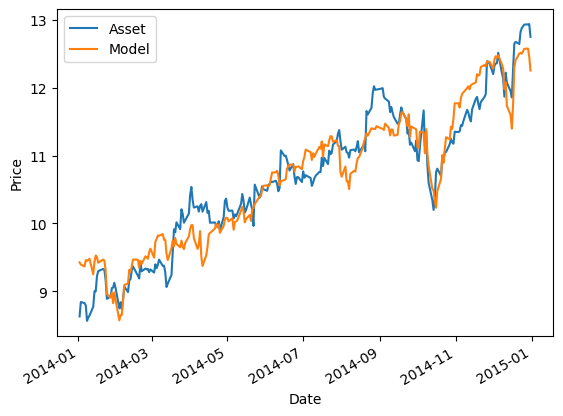

In [34]:
# Load pricing data for asset and two market indices
start = '2014-01-01'
end = '2015-01-01'
b1 = yf.download('SPY',start=start,end=end,auto_adjust=True)['Close']['SPY']
b2 = yf.download('MDY',start=start,end=end,auto_adjust=True)['Close']['MDY']
a = yf.download('HPQ',start=start,end=end,auto_adjust=True)['Close']['HPQ']

# Run multiple linear regression
mlr = regression.linear_model.OLS(a, sm.add_constant(np.column_stack((b1,b2)))).fit()

# Construct fit curve using dependent variables and estimated coefficients
mlr_prediction = mlr.params[0] + mlr.params[1]*b1 + mlr.params[2]*b2

print(f'R-squared: {mlr.rsquared_adj}')
print(f't-statistics of coefficients:\n {mlr.tvalues}')

# Plot asset and model
a.plot()
mlr_prediction.plot()
plt.legend(['Asset', 'Model']);
plt.ylabel('Price')

C:\Users\USER\AppData\Local\Temp\ipykernel_10188\1369032756.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slr_prediction = slr.params[0] + slr.params[1]*b1


R-squared: 0.8949527314817832
t-statistics of coefficients:
 const   -23.071547
SPY      46.253654
dtype: float64


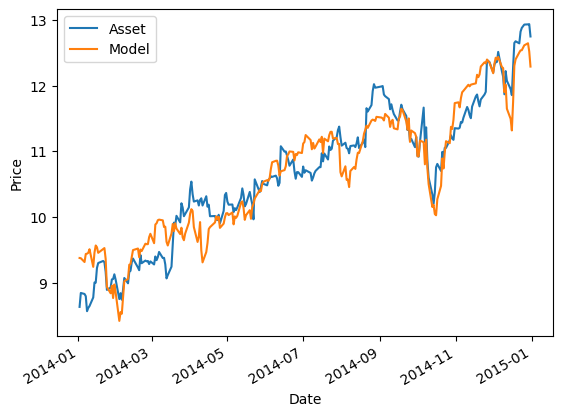

In [33]:
# Perform linear regression
slr = regression.linear_model.OLS(a, sm.add_constant(b1)).fit()
slr_prediction = slr.params[0] + slr.params[1]*b1

# Print fit statistics
print(f'R-squared: {slr.rsquared_adj}')
print(f't-statistics of coefficients:\n {slr.tvalues}')

# Plot asset and model
a.plot()
slr_prediction.plot()
plt.ylabel('Price')
plt.legend(['Asset', 'Model']);

# 앤스콤의 사중항 (Anscombe's Quartet)과 모델 진단

Coefficients: [3.00009091 0.50009091] [3.00090909 0.5       ] [3.00245455 0.49972727] [3.00172727 0.49990909]
Pearson r: 0.8164205163448396 0.8162365060002426 0.816286739489598 0.8165214368885026
R-squared: 0.666542459508775 0.6662420337274843 0.6663240410665594 0.6667072568984652


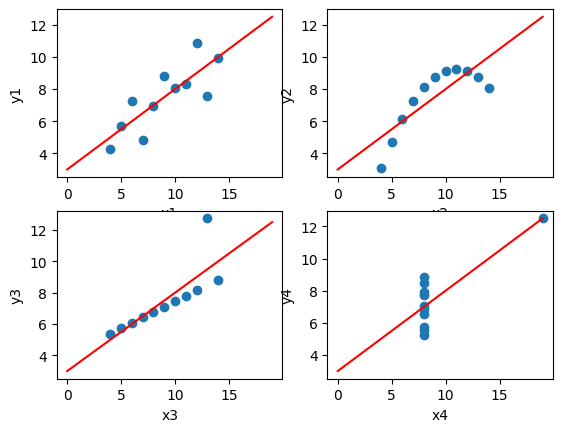

In [35]:
from scipy.stats import pearsonr

# Construct Anscombe's arrays
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

# Perform linear regressions on the datasets
slr1 = regression.linear_model.OLS(y1, sm.add_constant(x1)).fit()
slr2 = regression.linear_model.OLS(y2, sm.add_constant(x2)).fit()
slr3 = regression.linear_model.OLS(y3, sm.add_constant(x3)).fit()
slr4 = regression.linear_model.OLS(y4, sm.add_constant(x4)).fit()

# Print regression coefficients, Pearson r, and R-squared for the 4 datasets
print('Coefficients:', slr1.params, slr2.params, slr3.params, slr4.params)
print('Pearson r:', pearsonr(x1, y1)[0], pearsonr(x2, y2)[0], pearsonr(x3, y3)[0], pearsonr(x4, y4)[0])
print('R-squared:', slr1.rsquared, slr2.rsquared, slr3.rsquared, slr4.rsquared)

# Plot the 4 datasets with their regression lines
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
xs = np.arange(20)
ax1.plot(slr1.params[0] + slr1.params[1]*xs, 'r')
ax1.scatter(x1, y1)
ax1.set_xlabel('x1')
ax1.set_ylabel('y1')
ax2.plot(slr2.params[0] + slr2.params[1]*xs, 'r')
ax2.scatter(x2, y2)
ax2.set_xlabel('x2')
ax2.set_ylabel('y2')
ax3.plot(slr3.params[0] + slr3.params[1]*xs, 'r')
ax3.scatter(x3, y3)
ax3.set_xlabel('x3')
ax3.set_ylabel('y3')
ax4.plot(slr4.params[0] + slr4.params[1]*xs, 'r')
ax4.scatter(x4,y4)
ax4.set_xlabel('x4')
ax4.set_ylabel('y4');